<a href="https://colab.research.google.com/github/Donyicoder2006/Neural-Networks/blob/main/Aircraft_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download nesquik/aircraft-images

Dataset URL: https://www.kaggle.com/datasets/nesquik/aircraft-images
License(s): unknown
100% 3.60G/3.60G [01:03<00:00, 199MB/s]
100% 3.60G/3.60G [01:03<00:00, 61.3MB/s]


In [ ]:
!unzip aircraft-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/train/Tu-134/photo_1163718_rf-90914-russia-air-force-tupolev-tu-134a_.jpg  
  inflating: data/train/Tu-134/photo_1163961_ew-65663-aeroflot-tupolev-tu-134a_.jpg  
  inflating: data/train/Tu-134/photo_1165922_rf-12037-russia-navy-tupolev-tu-134ubl_.jpg  
  inflating: data/train/Tu-134/photo_1178646_rf-12000-russia-navy-tupolev-tu-134ubl_.jpg  
  inflating: data/train/Tu-134/photo_1180485_rf-65733-russia-air-force-tupolev-tu-134ubl_.jpg  
  inflating: data/train/Tu-134/photo_1184329_rf-93949-russia-air-force-tupolev-tu-134ubl_.jpg  
  inflating: data/train/Tu-134/photo_1187347_65724-sibnia-tupolev-tu-134_.jpg  
  inflating: data/train/Tu-134/photo_1190483_ra-65562-gromov-flight-research-institute-tupolev-tu-134_.jpg  
  inflating: data/train/Tu-134/photo_1197159_ra-65693-alrosa-tupolev-tu-134b_.jpg  
  inflating: data/train/Tu-134/photo_1203667_20-russia-air-force-tupolev-tu-134sh_.jpg  
  inflating: data/train/Tu-134/ph

In [ ]:
import os
import pandas as pd

In [ ]:
data_dir = "/content/data"

In [ ]:
image_paths = []
labels = []

for root, _, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(root, file)
            label = os.path.basename(root)
            image_paths.append(image_path)
            labels.append(label)

In [ ]:
df = pd.DataFrame({'image_path': image_paths, 'label': labels})

In [ ]:
display(df.head())

,image_path,label
0,/content/data/test/Rafale/photo_400_281653.jpg,Rafale
1,/content/data/test/Rafale/photo_400_300506.jpg,Rafale
2,/content/data/test/Rafale/photo_400_281952.jpg,Rafale
3,/content/data/test/Rafale/photo_400_305808.jpg,Rafale
4,/content/data/test/Rafale/photo_400_300132.jpg,Rafale


In [ ]:
df.shape

(37737, 2)

In [ ]:
train_df = df.sample(frac=1,random_state=0).iloc[:33000]
test_df = df.sample(frac=1,random_state=0).iloc[33000:]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
Train_Datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    validation_split = 0.2,
    rotation_range = 0.2,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = 'nearest'
)
Test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
Train_Generator = Train_Datagen.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'image_path',
    y_col = 'label',
    target_size = (224,200)
)
Test_Generator = Test_datagen.flow_from_dataframe(
    dataframe = test_df,
    x_col = 'image_path',
    y_col = 'label',
    target_size = (224,200)
)

Found 33000 validated image filenames belonging to 84 classes.
Found 4737 validated image filenames belonging to 84 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

In [ ]:
Pre_model = ResNet50(include_top=False,input_shape=(224,200,3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
Pre_model.trainable = False

In [ ]:
Model = Sequential()
Model.add(Pre_model)
Model.add(Flatten())
Model.add(Dense(100, activation = "selu"))
Model.add(Dense(100, activation = "selu"))
Model.add(Dense(84, activation = "softmax"))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
Early_stop = EarlyStopping(monitor = "val_loss",patience = 3,verbose=1,restore_best_weights=True,mode="auto",min_delta=0.00000001)

In [ ]:
from tensorflow.keras.optimizers import Adam,RMSprop

In [ ]:
from tensorflow.keras.utils import plot_model

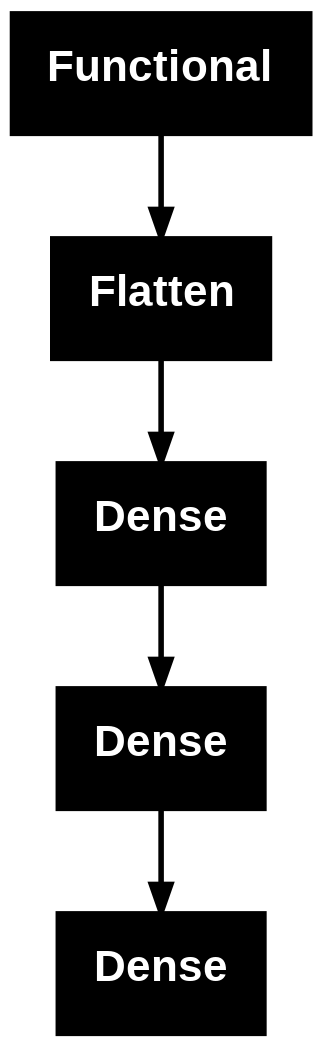

In [ ]:
plot_model(Model)

In [ ]:
Model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │    10,035,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 84)             │         8,484 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,641,596 (128.33 MB)

 Trainable params: 10,053,884 (38.35 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
Model.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
History = Model.fit(Train_Generator,validation_data=Test_Generator,epochs=5,callbacks=[Early_stop])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 527s 497ms/step - accuracy: 0.0163 - loss: 4.5811 - val_accuracy: 0.0260 - val_loss: 4.3046
Epoch 2/5
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 477s 462ms/step - accuracy: 0.0268 - loss: 4.3673 - val_accuracy: 0.0365 - val_loss: 4.2765
Epoch 3/5
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 466s 452ms/step - accuracy: 0.0314 - loss: 4.2807 - val_accuracy: 0.0612 - val_loss: 4.1111
Epoch 4/5
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 463s 448ms/step - accuracy: 0.0403 - loss: 4.2064 - val_accuracy: 0.0388 - val_loss: 4.1957
Epoch 5/5
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 461s 447ms/step - accuracy: 0.0476 - loss: 4.1639 - val_accuracy: 0.0545 - val_loss: 4.0415
Restoring model weights from the end of the best epoch: 5.


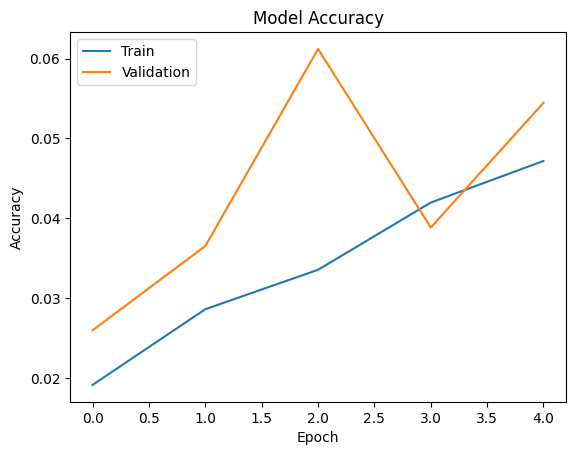

In [ ]:
import matplotlib.pyplot as plt

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.utils import load_img

image_path = "/content/A330.webp"
img = load_img(image_path, target_size=(224, 200))

In [ ]:
from tensorflow.keras.utils import img_to_array

img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [ ]:
import numpy as np

img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
img_array = preprocess_input(img_array)

In [ ]:
pred = Model.predict(img_array)
predicted_class_index = np.argmax(pred, axis=1)[0]
class_labels = list(Train_Generator.class_indices.keys())
predicted_class_label = class_labels[predicted_class_index]
print(f"The following Aircraft type is: {predicted_class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The following Aircraft type is: Beechcraft 1900
